# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [5]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

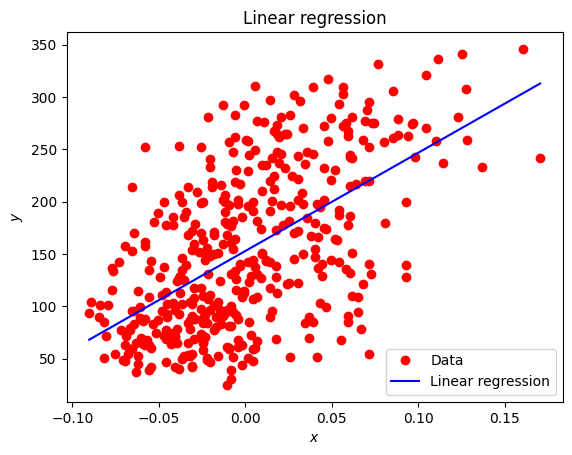

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [7]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [10]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

#### Initialization of dataset variables

In [11]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.datasets import load_diabetes, load_breast_cancer

breast_cancer = datasets.load_breast_cancer()

# create train and test datasets for the breast cancer dataset
X_bc = breast_cancer.data
y_bc = breast_cancer.target

#X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X, y, stratify=y, random_state=40)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, stratify=y_bc, random_state=40)

# create train and test
# datasets for the diabetes dataset
X_diabetes = diabetes.data
y_diabetes = diabetes.target

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, random_state=40)


### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

#### Answer

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

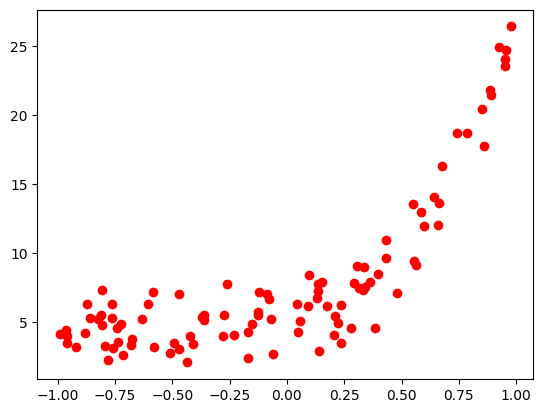

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

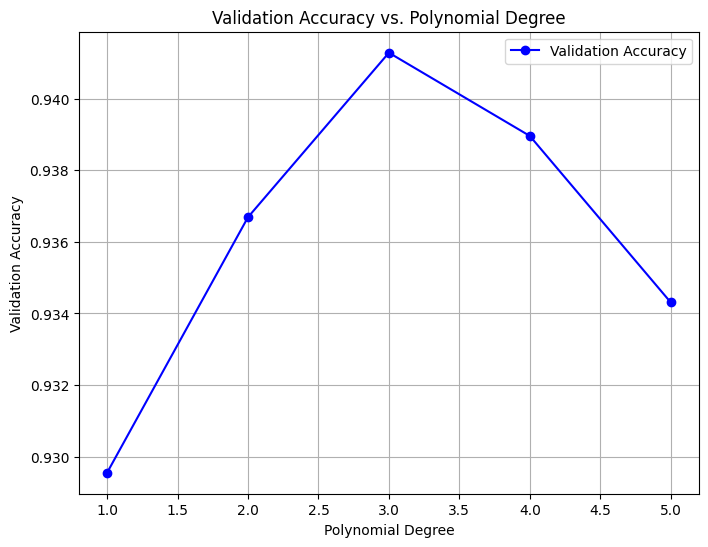

Best polynomial degree: 3
Validation Accuracy of best model: 0.9412859097127223
Test Accuracy: 0.951048951048951


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score

# Set up the pipeline with PolynomialFeatures and LogisticRegression

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Step to generate polynomial features
    ('logistic', LogisticRegression())  # Step for logistic regression
])

# Define the hyperparameters for grid search: the degree of the polynomial
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Testing polynomial degrees from 1 to 10
}

# Set up GridSearchCV 
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_bc_train, y_bc_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Extract mean test scores and polynomial degrees
mean_test_scores = cv_results['mean_test_score']
degrees = param_grid['poly__degree']

# Plot the learning curve (validation accuracy as a function of polynomial degree)
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_test_scores, marker='o', color='b', label='Validation Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()

# Print the best polynomial degree and test score
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")
print(f"Validation Accuracy of best model: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_bc_pred = best_model.predict(X_bc_test)
test_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print(f"Test Accuracy: {test_accuracy}")

In [22]:
print(y_diabetes_train.shape)
print(y_diabetes_test.shape)
print(X_diabetes_train.shape)
print(X_diabetes_test.shape)

(331,)
(111,)
(331, 10)
(111, 10)


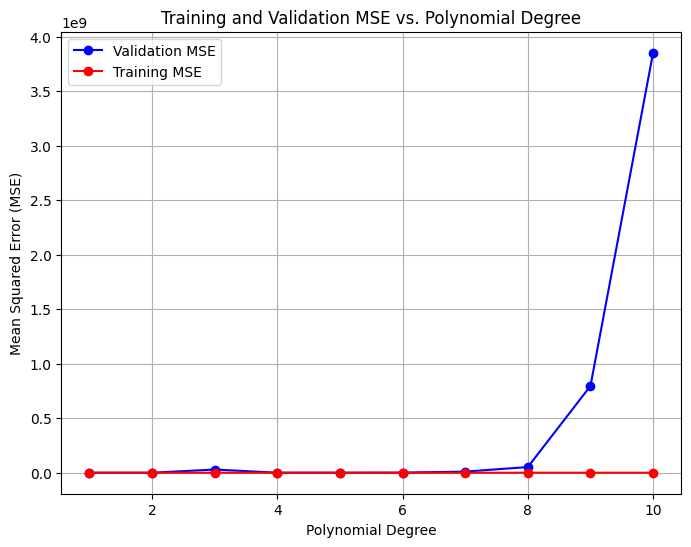

Best polynomial degree: 1
Validation MSE of best model: 2729.885739989991
Test MSE: 4005.2432354503294


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import datasets

# Set up the pipeline with PolynomialFeatures and LinearRegression with standard

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the input features
    ('poly', PolynomialFeatures()),  
    ('linear', LinearRegression())  
])

# Define the hyperparameters for grid search: the degree of the polynomial
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Testing polynomial degrees from 1 to 10
}

# Set up the GridSearchCV object with neg_mean_squared_error for regression scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # Add this to return train scores

# Fit the model using grid search
grid_search.fit(X_diabetes_train, y_diabetes_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Extract mean test scores (mean negative MSE) and polynomial degrees
mean_test_scores = -cv_results['mean_test_score']  # Negating the neg_mean_squared_error to get positive MSE
degrees = param_grid['poly__degree']

# Plot both training and validation error (MSE)

mean_train_scores = -cv_results['mean_train_score'] # Extract mean train scores and negate the negative MSE

# Plot both training and validation MSE
plt.figure(figsize=(8, 6))
plt.plot(degrees, mean_test_scores, marker='o', color='b', label='Validation MSE')
plt.plot(degrees, mean_train_scores, marker='o', color='r', label='Training MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE vs. Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show()


# Print the best polynomial degree and test score
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")
print(f"Validation MSE of best model: {-grid_search.best_score_}")  # Negative MSE was used, so negate it

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_diabetes_pred = best_model.predict(X_diabetes_test)
test_mse = mean_squared_error(y_diabetes_test, y_diabetes_pred)
print(f"Test MSE: {test_mse}")

#### Introduction/Explanation of code

In [33]:
# @Zeynep you can mention here that the diabetes regression model directly above likely is overfitting. 
# As polynomial degrees increase, the model complexity grows. If you see a huge spike in MSE for higher degrees, 
# it indicates overfitting. A high-degree polynomial model fits the training data too well (capturing noise), but it performs poorly on the test data, 
# which can be seen in the higher MSE. This is why it is useful to show both the training and validation MSE to see where the gap is growing due to
# overfitting. Also we do not use the validation accuracy graph on the diabetes regression task, as accuracy does not make sense for regression.
# Finally, the breast cancer gridsearch only goes up to 5 degrees because otherwise running that cell takes a really, really long time.

#### Results & Discussion

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

#### Introduction/ Explanation of code

#### Results & Discussion

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


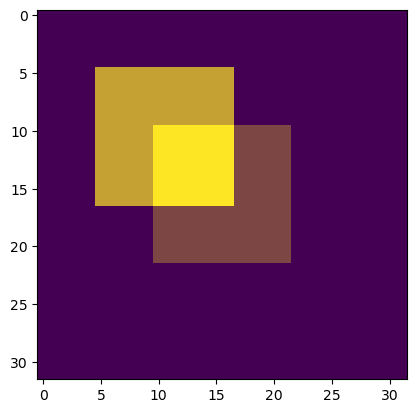

In [18]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

#### Introduction/Explanation of code

#### Results & Discussion